In [297]:
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

In [298]:
logo = cv2.imread('..\\data\\logo\\small.jpg')
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

positive = cv2.imread('..\\data\\positivies\\ojE5F07GmKo.jpg')
positive = cv2.cvtColor(positive, cv2.COLOR_BGR2GRAY)

In [299]:
aug = iaa.Resize(256)
# positive = aug.augment_image(positive)
logo = aug.augment_image(logo)

In [300]:
sift = cv2.SIFT_create()

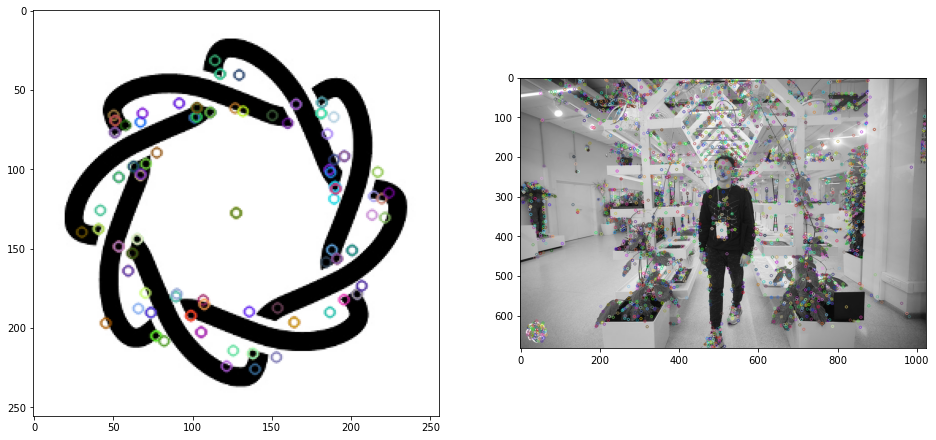

In [301]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

keypoints_1, descriptors_1 = sift.detectAndCompute(logo, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(positive, None)

img_1 = cv2.drawKeypoints(logo, keypoints_1, logo)
ax[0].imshow(img_1)

img_2 = cv2.drawKeypoints(positive, keypoints_2, positive)
ax[1].imshow(img_2)

109
0


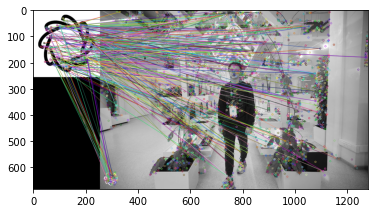

In [302]:
flann=cv2.FlannBasedMatcher(dict(algorithm=0, tree=5),{})

matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
# matches = sorted(matches, key = lambda x : x.distance)

print(len(matches))

goodMatch=[] ## pnly
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        goodMatch.append(m)

print(len(goodMatch))

img3 = cv2.drawMatchesKnn(img_1, keypoints_1, img_2, keypoints_2, matches, img_2, flags=2)
plt.imshow(img3)
plt.show()
